### Import Dependencies

In [3]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

### Dataset sample

In [13]:
path1 = "./Processed Data/aavash1_processed.csv"
data = pd.read_csv(path1, header=None).values
amp = data[:,52:104]
a = pd.DataFrame(amp).apply(pd.to_numeric, errors='coerce').values
a = np.nan_to_num(a)

In [14]:
display(pd.DataFrame(a))

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,210.342578,283.622989,318.025156,273.738927,164.684547,88.102213,228.740027,454.394102,628.411489,749.230272,...,542.071951,685.631096,821.922746,933.332202,956.174147,943.716059,855.851623,690.047100,494.494692,234.795656
1,461.885267,595.242808,696.715867,697.906154,654.129192,634.527383,473.769986,426.957843,357.531817,323.562977,...,666.985007,587.766110,463.314148,382.989556,321.547819,305.221231,401.997512,461.061818,483.566955,377.025198
2,362.829161,497.321827,538.075274,599.287911,530.292372,431.551851,327.844475,262.611881,237.033753,252.675681,...,668.025449,556.118692,484.753546,225.079986,242.942380,206.293480,290.270563,284.344861,351.445586,271.140185
3,345.950864,534.804637,590.181328,638.376848,598.579151,541.089641,373.108563,403.209623,280.178515,213.740497,...,546.772348,453.788497,361.653149,323.904307,291.979451,280.016071,299.813275,375.366488,336.005952,298.933103
4,479.087675,680.294054,686.865343,674.329296,514.186737,552.000906,645.864537,495.827591,435.690257,355.877788,...,876.132981,680.036028,502.152367,302.790357,237.103353,242.736483,389.178622,519.849978,481.702190,416.828502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,93.300589,87.281155,120.619236,255.431008,398.327754,549.421514,727.782935,766.381759,875.334222,876.002283,...,796.276962,813.910314,809.504169,763.000655,696.916781,629.584784,561.918144,442.485028,333.061556,180.113853
2233,339.330223,453.357475,565.099991,626.278692,621.579440,616.525750,600.201633,564.932739,552.602932,528.503548,...,624.945598,487.315093,440.477014,262.345192,341.502562,294.278779,458.981481,419.672491,438.511117,314.682380
2234,223.008968,165.583816,269.356641,292.385020,380.539091,483.321839,562.211704,679.155358,768.417204,830.086742,...,642.059187,639.282410,682.586991,763.288936,730.529945,724.189202,724.859297,636.440099,520.947214,291.382910
2235,197.253644,324.722959,256.908544,195.432853,284.114414,196.420467,137.931142,261.629509,436.033256,406.509532,...,332.453004,341.344401,358.468967,404.969135,188.281704,294.187015,294.187015,148.660687,219.822656,164.012195


### Amplitude plot

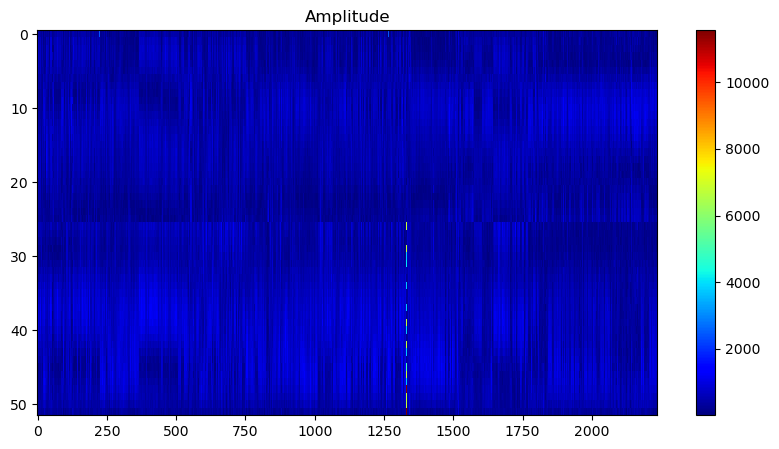

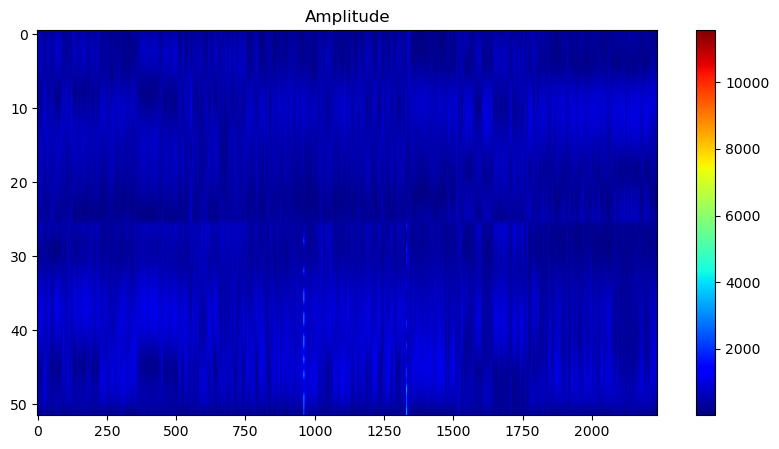

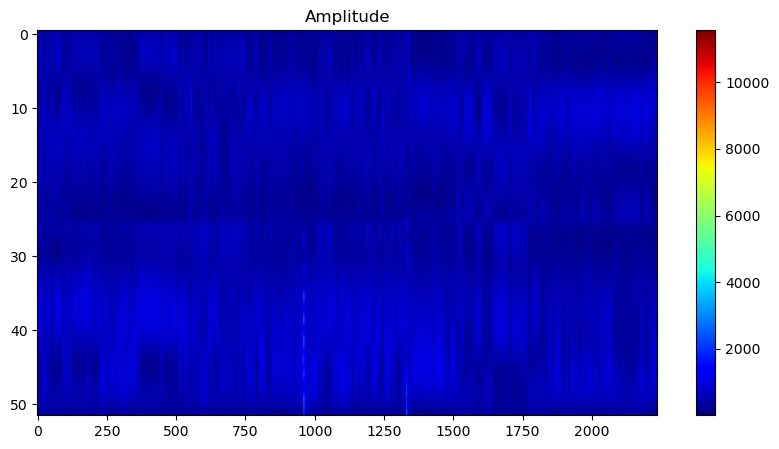

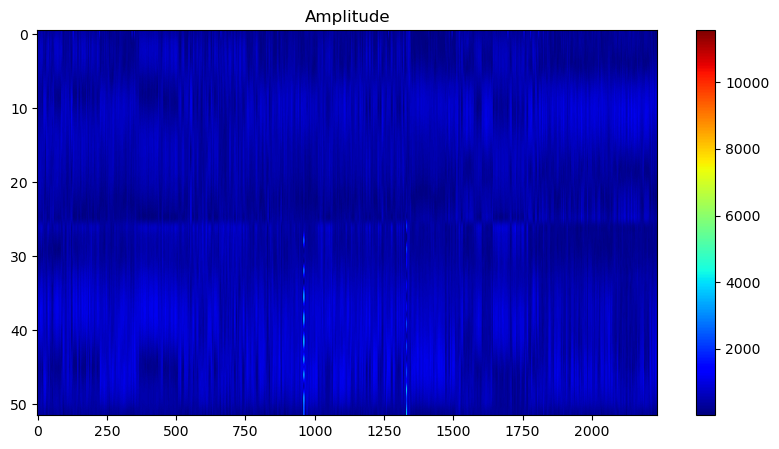

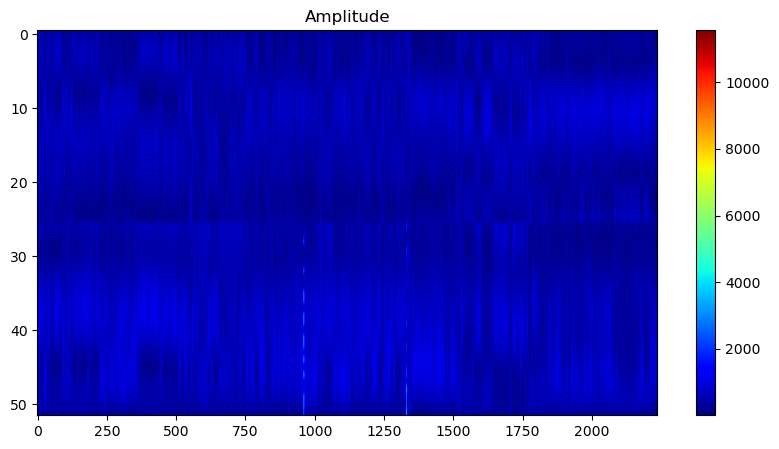

In [18]:
fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(311)
plt.imshow(a[:,0:52].T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()

fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(211)
plt.imshow(a[:,0:52].T,interpolation = "bilinear", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()

fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(311)
plt.imshow(a[:,:].T,interpolation = "bicubic", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()

fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(111)
plt.imshow(a[:,:].T,interpolation = "spline36", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()

fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(111)
plt.imshow(a[:,:].T,interpolation = "hamming", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()
plt.show()

### PCA Component Visualization

In [38]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(path1):

    data = pd.read_csv(path1, header=None).values
    amp = data[:,52:104]
    a = pd.DataFrame(amp).apply(pd.to_numeric, errors='coerce').values
    a = np.nan_to_num(a)

    constant_offset = np.empty_like(a)
    filtered_data = np.empty_like(a)

    for i in range(1, len(a[0])):
        constant_offset[:,i] = moving_average(a[:,i], 10)

    filtered_data = a - constant_offset

    for i in range(1, len(a[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    
    cov_mat2 = np.cov(filtered_data.T)
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)

    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]

    pca_data2 = filtered_data.dot(eig_vec2)
    xmin = 0
    xmax = 20000

    fig1 = plt.figure(figsize = (18,20))
    
    ax1 = plt.subplot(811)
    plt.plot(pca_data2[xmin:xmax,0])
    ax1 = plt.title("PCA 1st component")
    plt. show()

    fig2 = plt.figure(figsize = (18,20))

    ax2 = plt.subplot(812)
    plt.plot(pca_data2[xmin:xmax,1])
    #plt.plot(pca_data2[2500:17500,1])
    ax2.set_title("PCA 2nd component")

    plt.show()

    fig3 = plt.figure(figsize = (18,20))
    
    ax3 = plt.subplot(813)
    plt.plot(pca_data2[xmin:xmax,2])
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 3rd component")

    plt.show()

    fig3 = plt.figure(figsize = (18,20))

    ax3 = plt.subplot(814)
    plt.plot(pca_data2[xmin:xmax,3])
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 4 component")

    plt.show()

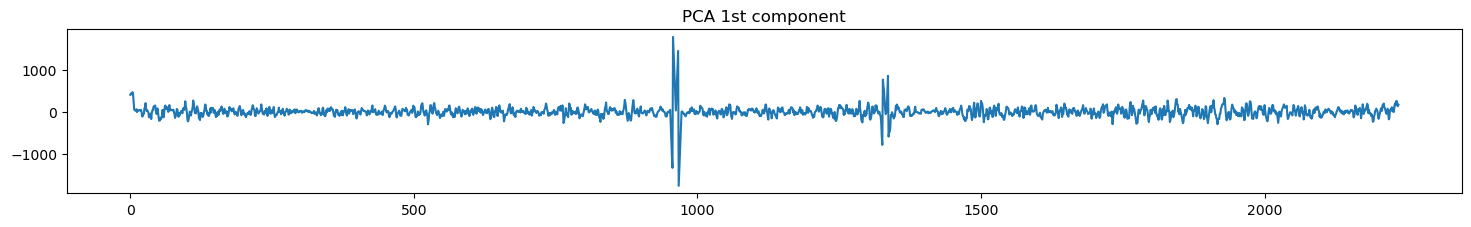

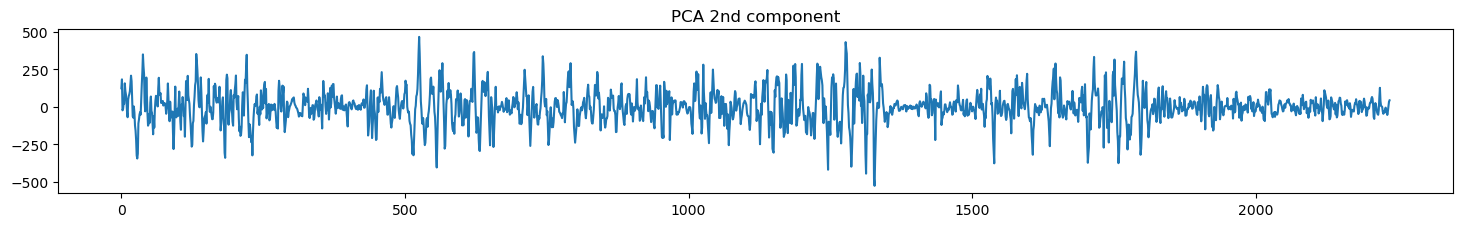

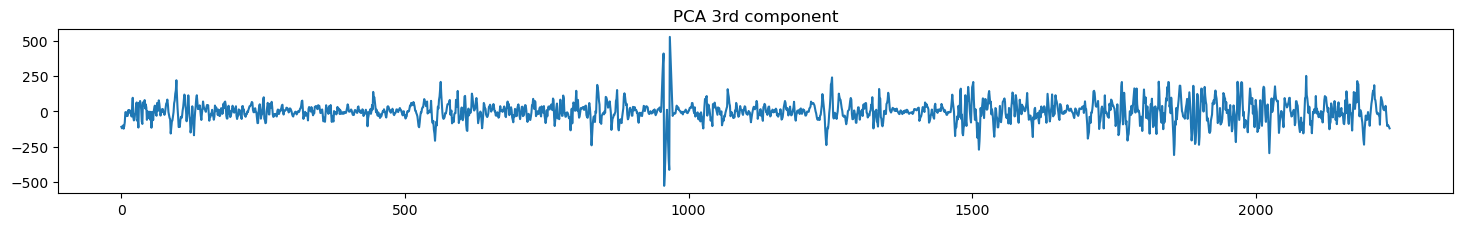

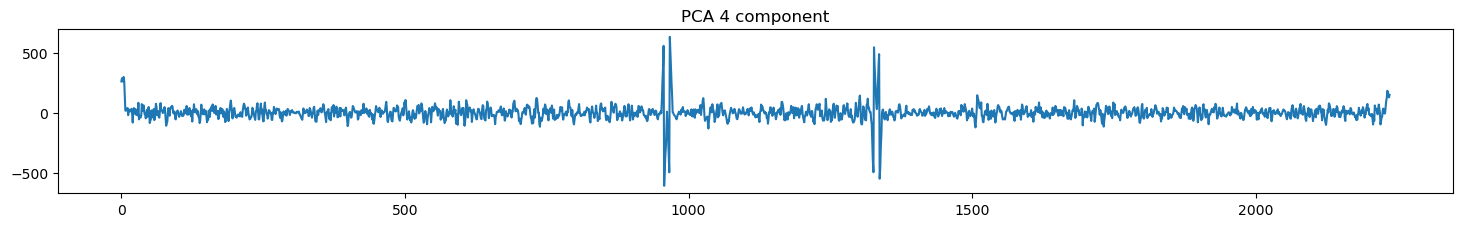

In [39]:
visualize(path1 = "./Processed Data/aavash1_processed.csv")

### Spectrogram (STFT)

In [65]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(path1):

    data = pd.read_csv(path1, header=None).values
    amp = data[:,52:104]
    a = pd.DataFrame(amp).apply(pd.to_numeric, errors='coerce').values
    a = np.nan_to_num(a)

    constant_offset = np.empty_like(a)
    filtered_data = np.empty_like(a)

    for i in range(1, len(a[0])):
        constant_offset[:,i] = moving_average(a[:,i], 10)

    filtered_data = a - constant_offset

    for i in range(1, len(a[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    
    cov_mat2 = np.cov(filtered_data.T)
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)

    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]

    pca_data2 = filtered_data.dot(eig_vec2)
    xmin = 0
    xmax = 20000

    plt.figure(figsize = (18,30))
    # Spectrogram(STFT)
    plt.subplot(211)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,0], NFFT=128, Fs=500, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,30))

    plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,1], NFFT=128, Fs=500, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,30))

    plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,2], NFFT=128, Fs=500, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,30))

    plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,3], NFFT=128, Fs=500, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,10))
    ax = plt.subplot(111)
    # ax.magnitude_spectrum(pca_data2[:,0], Fs=1000, scale='dB', color='C1')
    ax.magnitude_spectrum(pca_data2[:,0], Fs=500, color='C1')
    plt.xlim(0,100)
    plt.ylim(0,1000)
    plt.show()

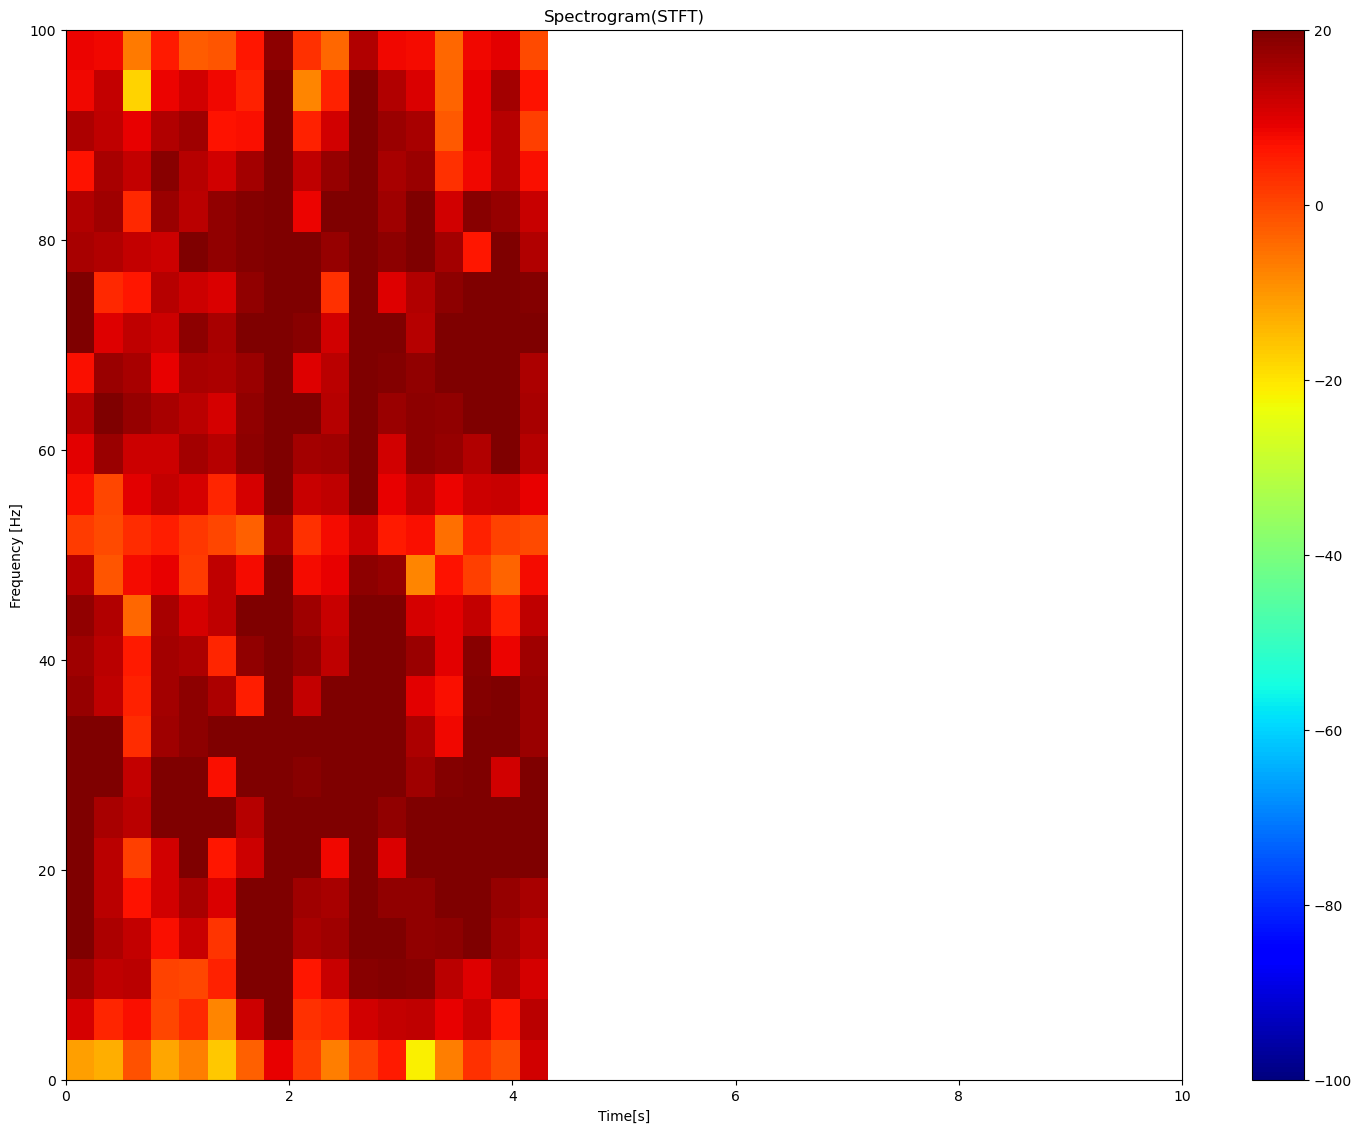

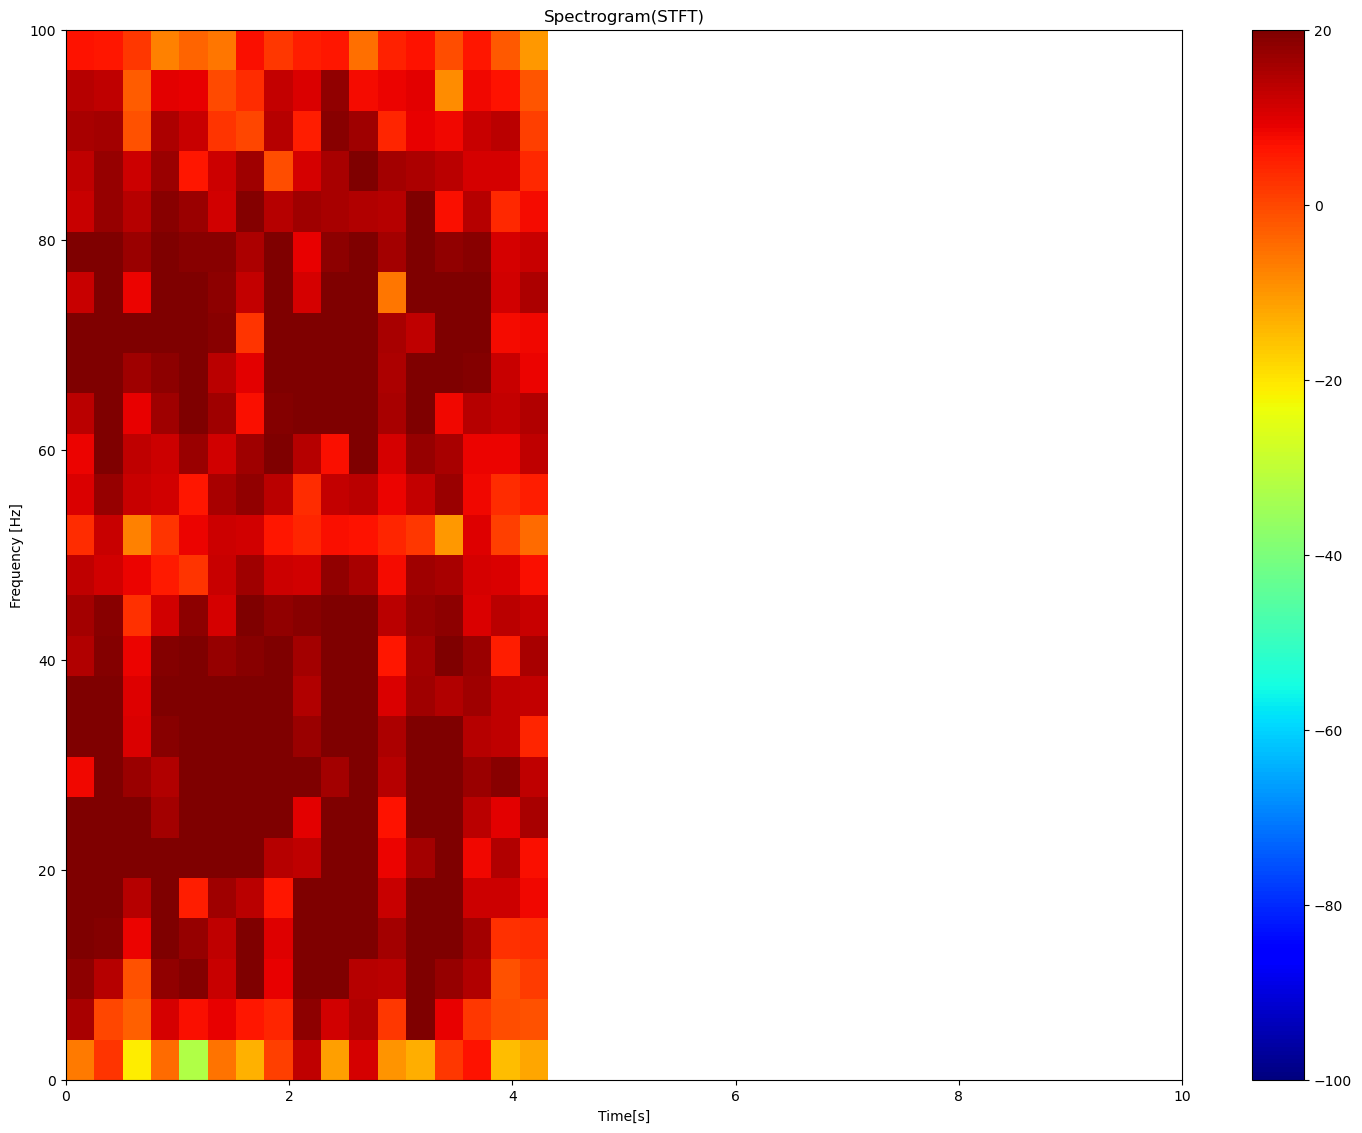

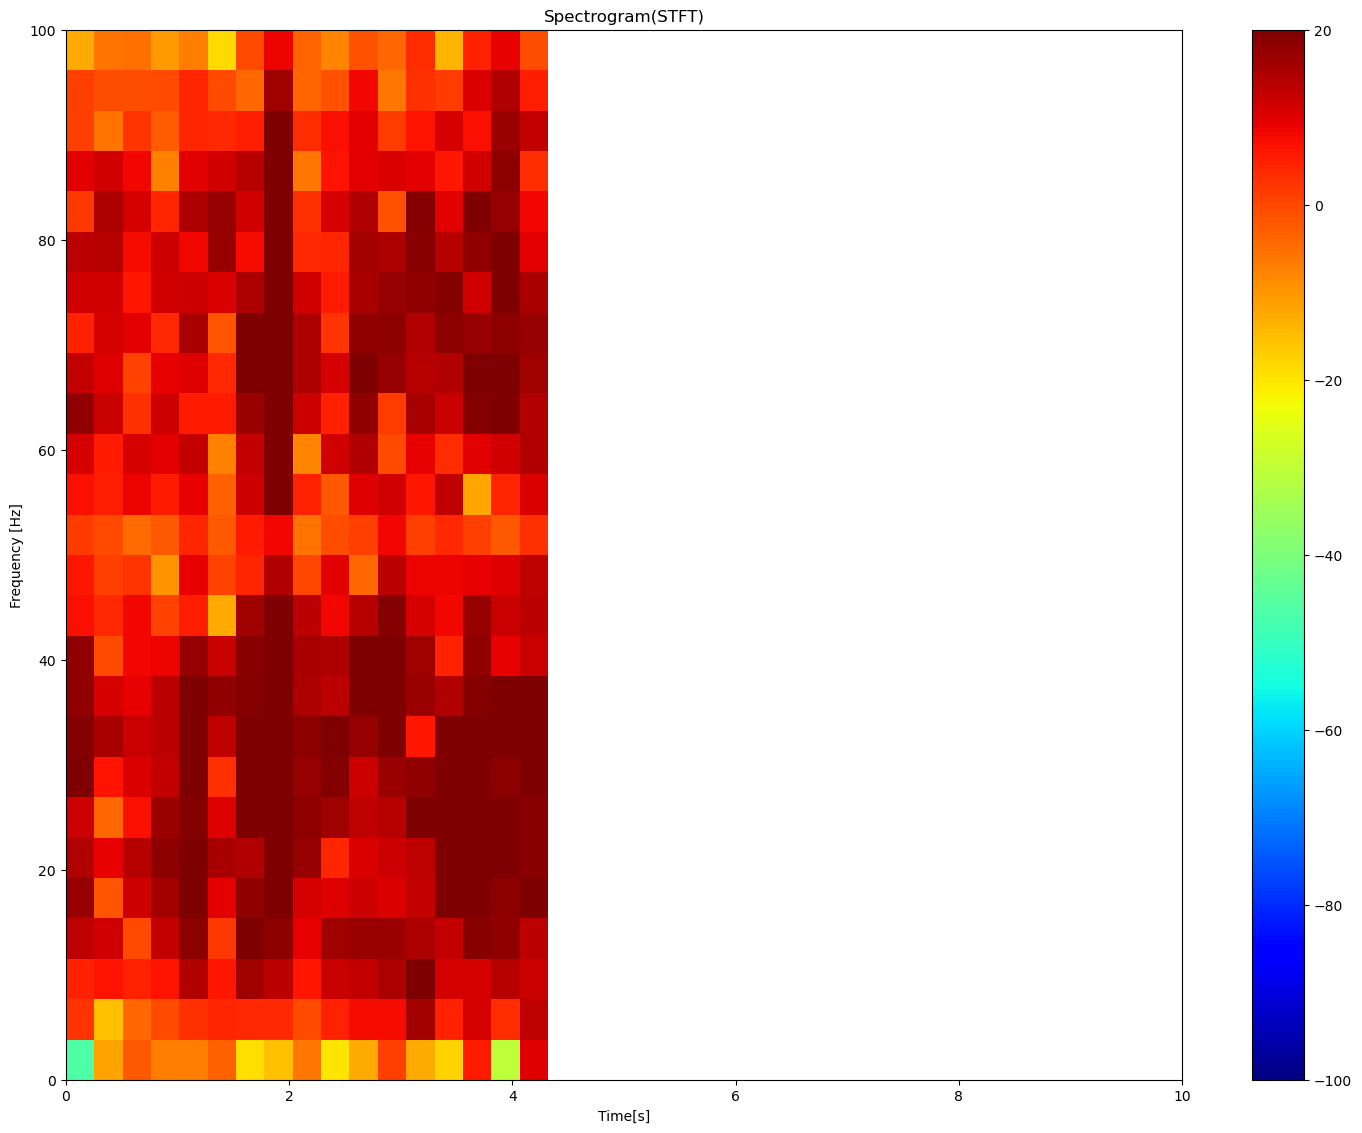

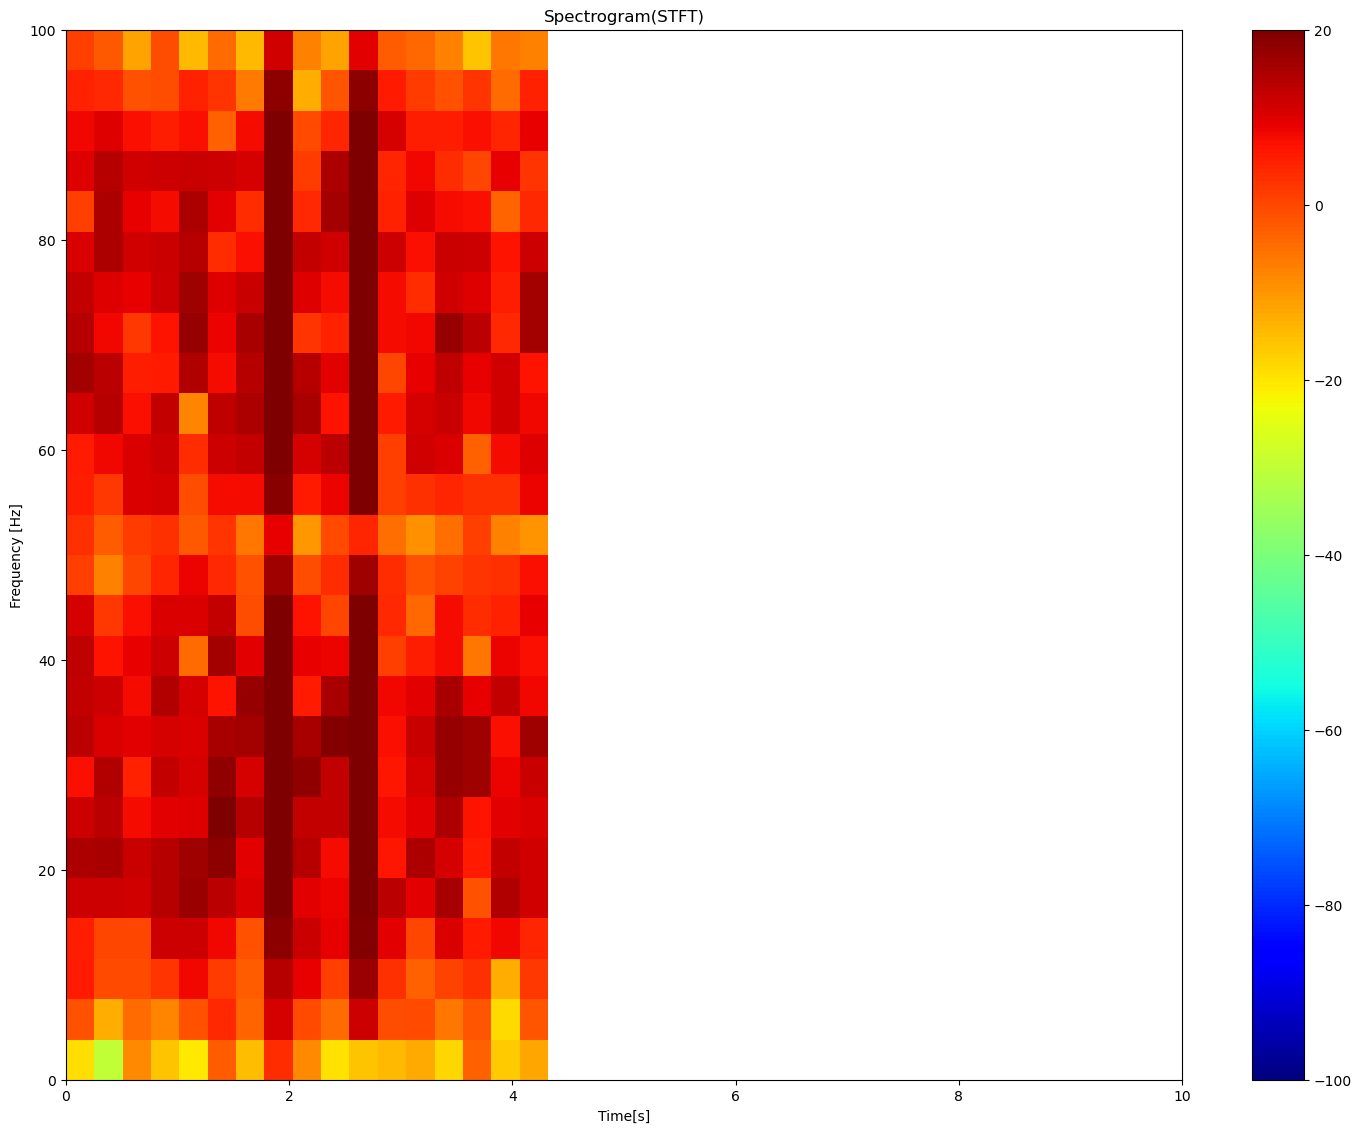

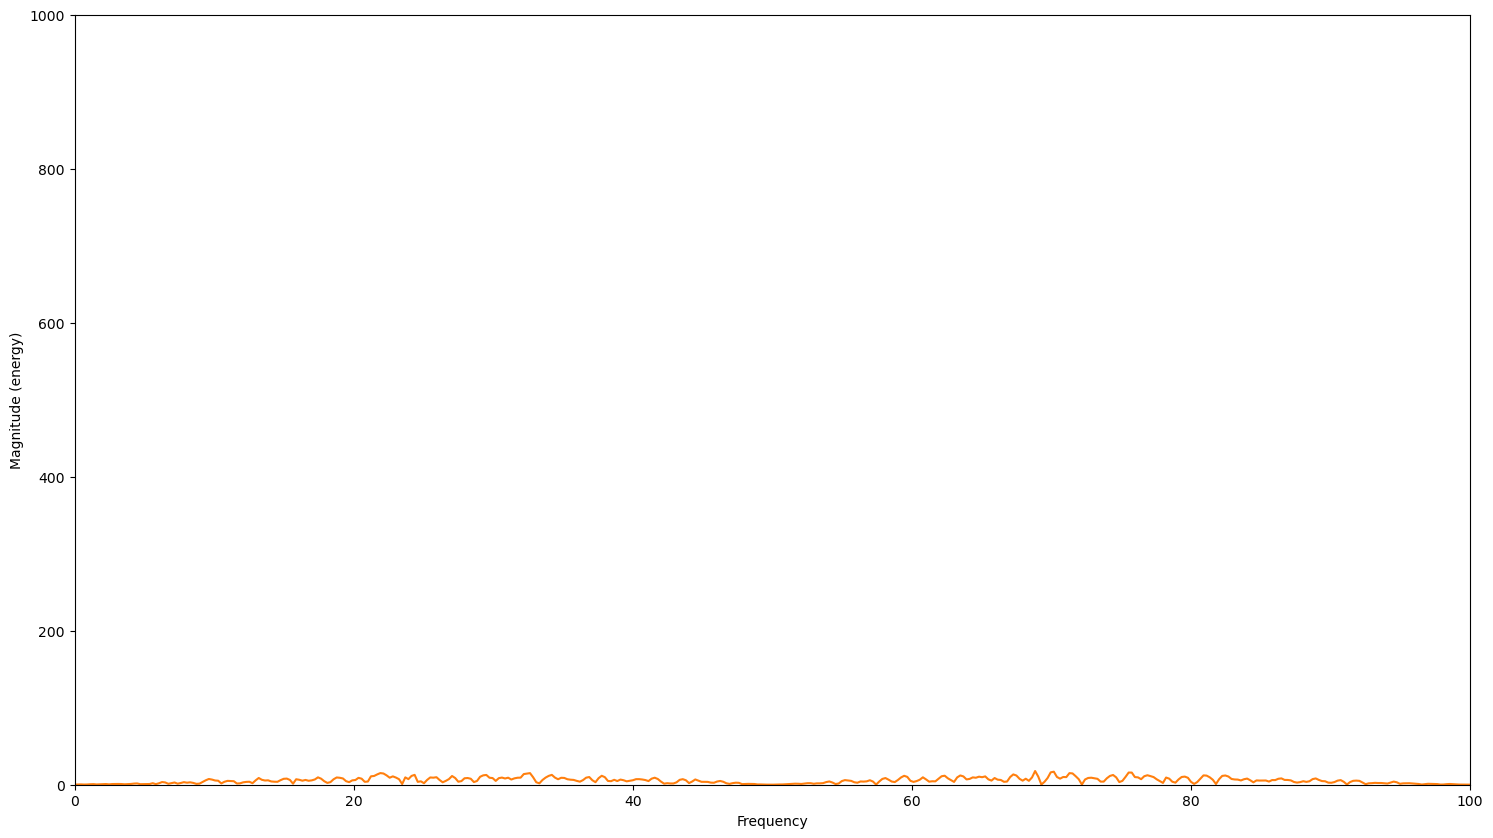

In [66]:
visualize(path1 = "./Processed Data/aavash1_processed.csv")

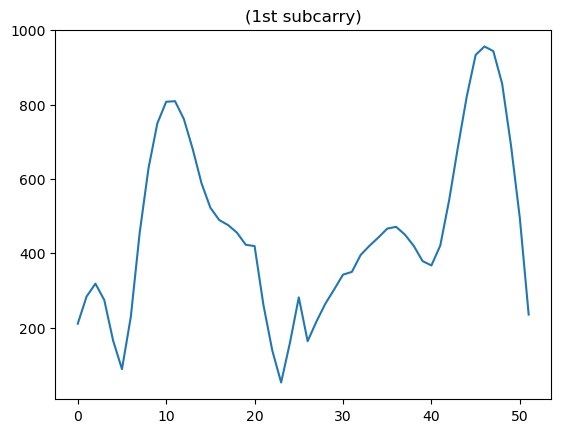

In [64]:
ax3 = plt.subplot(111)
plt.plot(a[0])
ax3 = plt.title("(1st subcarry)")
plt.show()